## Import Libraries

In [10]:
import pandas as pd
import regex as re
import numpy as np
import logging

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
%config InlineBackend.figure_formats = ['svg']

# ML Modeling
from sklearn.metrics import precision_recall_fscore_support,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay,roc_curve
from sklearn.preprocessing import normalize

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Saving and importing trained models
import pickle

import mpld3

## Import and Review Data

In [2]:
df = pd.read_csv("resume.csv")
df.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


In [3]:
# Find the interested column/variable types: firstname, race, and gender.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_ad_id               4870 non-null   int64  
 1   job_city                4870 non-null   object 
 2   job_industry            4870 non-null   object 
 3   job_type                4870 non-null   object 
 4   job_fed_contractor      3102 non-null   float64
 5   job_equal_opp_employer  4870 non-null   int64  
 6   job_ownership           4870 non-null   object 
 7   job_req_any             4870 non-null   int64  
 8   job_req_communication   4870 non-null   int64  
 9   job_req_education       4870 non-null   int64  
 10  job_req_min_experience  2124 non-null   object 
 11  job_req_computer        4870 non-null   int64  
 12  job_req_organization    4870 non-null   int64  
 13  job_req_school          4870 non-null   object 
 14  received_callback       4870 non-null   

In [4]:
df.firstname.describe()

count       4870
unique        36
top       Tamika
freq         256
Name: firstname, dtype: object

In [5]:
name_freq = df['firstname'].value_counts()
name_freq.head(15)

firstname
Tamika      256
Anne        242
Allison     232
Latonya     230
Emily       227
Latoya      226
Kristen     213
Ebony       208
Tanisha     207
Jill        203
Lakisha     200
Kenya       196
Laurie      195
Sarah       193
Meredith    187
Name: count, dtype: int64

Initial observations: there are 4870 entries, but there are only 36 unique names. These names are divided into stereotypical racial names ('Tamika' for example, is a stereotypical name for a black woman. This name appeared 256 in the samples.)

C:\Users\cradd\AppData\Local\Temp\ipykernel_17272\4224729046.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


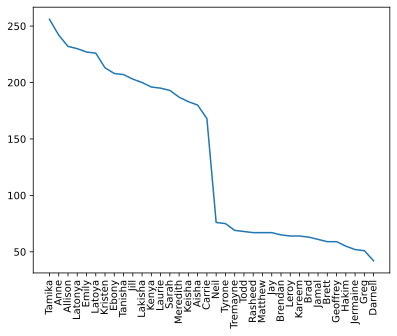

In [15]:
fig, ax = plt.subplots()

ax.plot(df['firstname'].value_counts())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

html_plot = mpld3.fig_to_html(fig)

with open('name_frequency.html', 'w') as file:
    file.write(html_plot)

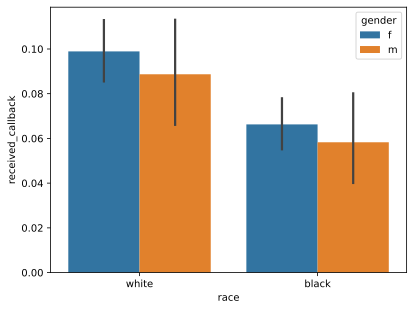

In [23]:
values = ['race', 'gender']
call = 'received_callback'

fig, ax = plt.subplots()

sns.barplot(data=df, x='race', y='received_callback', hue='gender')

html_plot = mpld3.fig_to_html(fig)

with open('race_gender_call.html', 'w') as file:
    file.write(html_plot)

In [ ]:
#Selecting gender, race, and name that can affect callback. 
grn = ['race', 'gender', 'firstname']
call = 'received_callback'

# Convert categorical variables to numerical using one-hot encoding
df_callback = pd.get_dummies(df[grn + [call]])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_callback.drop(call, axis=1), df_callback[call], test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficient importance of race, gender, and names. 
grn_importance = abs(model.coef_[0])
grn_names = X_train.columns

sorted_features = sorted(zip(grn_importance, grn_names), reverse=True)

firstname_Aisha: 0.7175248940920254
firstname_Tremayne: 0.6540463866102026
firstname_Leroy: 0.6393991464903692
firstname_Jay: 0.6077428261633956
firstname_Brett: 0.4912346508775618
firstname_Jermaine: 0.42785113084199694
firstname_Kristen: 0.42250567997666416
firstname_Ebony: 0.4101310504832183
firstname_Brad: 0.39454110459106967
firstname_Lakisha: 0.37557787433065287
firstname_Brendan: 0.3530415325288839
firstname_Latonya: 0.3247593947867748
firstname_Keisha: 0.3227645141381308
firstname_Rasheed: 0.30661317753545914
firstname_Kenya: 0.2420399891284752
race_white: 0.24177957460634245
race_black: 0.23892940499126314
firstname_Emily: 0.20911407116326872
firstname_Todd: 0.1766692204569854
firstname_Neil: 0.17666922045698516
firstname_Anne: 0.16384019063675648
firstname_Jamal: 0.1604751467026218
firstname_Geoffrey: 0.11175190198811462
firstname_Tyrone: 0.1054476150814605
firstname_Hakim: 0.10291928339181973
firstname_Matthew: 0.1020180453194705
firstname_Tanisha: 0.09915860819222617
firstn

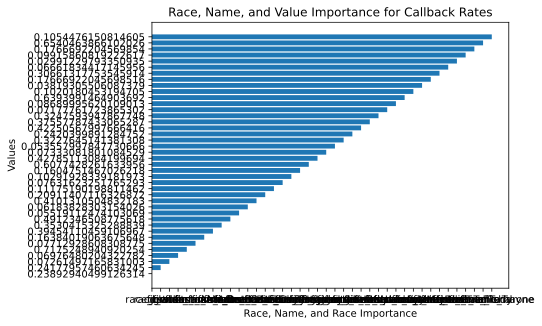

In [ ]:
# Print the feature importance
for importance, feature in sorted_features:
    print(f"{feature}: {importance}")

# Visualize feature importance
plt.barh(range(len(grn_importance)), grn_names, tick_label=grn_importance)
plt.xlabel('Race, Name, and Race Importance')
plt.ylabel('Values')
plt.title('Race, Name, and Value Importance for Callback Rates')
plt.show()

In [ ]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

# Evaluate model performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

print('Logistic Regression:')
evaluate_model(y_test, model_pred)

Logistic Regression:
Accuracy: 0.9343


In [ ]:
model_pkl_file = "racial_bias_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)